In [1]:
import sys

sys.path.append("/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv")
import torch
import numpy as np
from resnet_model import new_ResNet18
from prepare_data import distributed_cifar10_dataloaders
from training import train_PullSum
from useful_functions import *
from new_network_func import *

In [2]:
n = 20
batch_size = 128

CIFAR10_root = (
    "/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/cifar-10-python/cifar-10-batches-py"
)

trainloader_list, testloader = distributed_cifar10_dataloaders(
    n, batch_size=batch_size, root=CIFAR10_root, seed=42
)

In [5]:
I = np.eye(n)
one = np.ones(n)
R = np.outer(one, one) / n
A,C=ring2()
B=get_B(A=A,u=2*n,n=n)

""" A, B = R, R """
show_row(A)
_, __ = test_row(A)
print(f"{_:.4e}, {__:.4e}")

A的第二大特征值: 0.9432052038994398
A的beta: 0.9817516470598356
A的spectral gap: 0.01824835294016436
A的kappa: 2.500000000000019
S_A是: 939.253280594398 

2.0079e+00, 5.3387e+04


optimizer初始化成功!


Training Progress: 100%|██████████| 300/300 [53:42<00:00, 10.74s/it, epoch=300, test_accuracy=90.7900000000%, test_loss=0.2698410084, train_loss=0.3590322440]


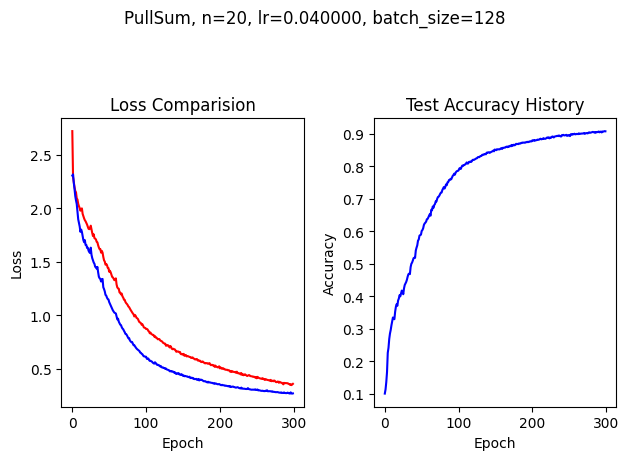

In [4]:
lr = 1e-3
epochs = 300
warm_up = False

train_loss_history, test_loss_history, test_accuracy_history = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=new_ResNet18,
    seed_for_model=42,
    epochs=epochs,
    lr=lr,
    trainloader_list=trainloader_list,
    testloader=testloader,
    show_graph=True,
    batch_size=batch_size,
    csv_root=f"/root/GanLuo/PullSum_MNIST/CIFAR10实验_arxiv/分布式实验/数值实验结果/Ring2, n={n}, lr={lr}, batch_size={batch_size}.csv",
    warm_up=warm_up,
)